In [142]:
import pandas as pd
import numpy as np


In [143]:
gini_df = pd.read_csv('GINI.csv')
tax_union_df = pd.read_csv('tax_union_data.csv')
gov_spending_df = pd.read_csv('gov_spending.csv')
unemp_intrate_df = pd.read_csv('OECD_LONGTERM_UNEMPLOYMENT_CLEANED.csv')
pop_gdp_inf_df = pd.read_csv('pop_gdp_inf.csv')


In [144]:
gini_df = gini_df.rename(columns={
    'value': 'GINI',
    'date': 'TIME_PERIOD',
    'country': 'Reference area'
})




unemp_intrate_df = unemp_intrate_df.rename(columns={
    'Country': 'REF_AREA',
    'Year': 'TIME_PERIOD'
})


pop_gdp_inf_df = pop_gdp_inf_df.rename(columns={
    'country': 'REF_AREA',
    'year': 'TIME_PERIOD'
})

In [145]:


megaframe = tax_union_df
megaframe = megaframe.drop(columns='Unnamed: 0', errors='ignore')
megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate
0,2000,Mexico,MEX,16.700001,35.0
1,2000,Mexico,MEX,16.700001,35.0
2,2000,Mexico,MEX,16.700001,35.0
3,2002,Mexico,MEX,15.500000,35.0
4,2002,Mexico,MEX,15.500000,35.0
...,...,...,...,...,...
2254,2018,Finland,FIN,60.000000,20.0
2255,2018,Finland,FIN,60.000000,20.0
2256,2019,Finland,FIN,58.799999,20.0
2257,2019,Finland,FIN,58.799999,20.0


In [146]:
print("gov_spending_df columns:", gov_spending_df.columns.tolist())
print("megaframe columns:", megaframe.columns.tolist())



gov_spending_df columns: ['Unnamed: 0', 'REF_AREA', 'TIME_PERIOD', 'Education spending', 'Health spending', 'Housing spending', 'Community development spending']
megaframe columns: ['TIME_PERIOD', 'Reference area', 'REF_AREA', 'Trade union density', 'Combined corporate income tax rate']


In [147]:



print("gov_spending_df columns:", gov_spending_df.columns.tolist())
print("megaframe columns:", megaframe.columns.tolist())


megaframe = pd.merge(megaframe, gov_spending_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')


gov_spending_df columns: ['Unnamed: 0', 'REF_AREA', 'TIME_PERIOD', 'Education spending', 'Health spending', 'Housing spending', 'Community development spending']
megaframe columns: ['TIME_PERIOD', 'Reference area', 'REF_AREA', 'Trade union density', 'Combined corporate income tax rate']


In [148]:
megaframe.drop(columns=['Unnamed: 0'], inplace=True)

megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN
1,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN
2,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN
3,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN
4,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2254,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053
2255,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053
2256,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008
2257,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008


In [149]:
unemp_intrate_df.rename(columns={'Country': 'REF_AREA'}, inplace=True)
megaframe = pd.merge(megaframe, unemp_intrate_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')

megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833
1,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833
2,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833
3,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333
4,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333
...,...,...,...,...,...,...,...,...,...,...,...
2254,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333
2255,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333
2256,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008,0.070000,6.741667
2257,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008,0.070000,6.741667


In [150]:
pop_gdp_inf_df.rename(columns={'country': 'REF_AREA','year': 'TIME_PERIOD'}, inplace=True)


megaframe = pd.merge(megaframe, pop_gdp_inf_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')
megaframe.drop(columns=['Unnamed: 0'], inplace=True)
megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)",Gini index
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
1,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
2,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
3,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333,NaN,NaN,NaN,NaN
4,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333,24963258.0,57196.422078,1.911401,34.3
2255,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333,24963258.0,57196.422078,1.911401,34.3
2256,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008,0.070000,6.741667,25334826.0,54972.701789,1.610768,NaN
2257,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008,0.070000,6.741667,25334826.0,54972.701789,1.610768,NaN


In [151]:


megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)",Gini index
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
1,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
2,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
3,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333,NaN,NaN,NaN,NaN
4,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333,24963258.0,57196.422078,1.911401,34.3
2255,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333,24963258.0,57196.422078,1.911401,34.3
2256,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008,0.070000,6.741667,25334826.0,54972.701789,1.610768,NaN
2257,2019,Finland,FIN,58.799999,20.0,0.058524,0.072091,0.006251,0.002008,0.070000,6.741667,25334826.0,54972.701789,1.610768,NaN


In [ ]:

megaframe = megaframe.dropna()
megaframe = megaframe.drop_duplicates()
# megaframe.to_csv('MEGAFRAME_CLEANEDV2.csv')   # commented to not perma run

In [153]:
megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)",Gini index
57,2001,Sweden,SWE,78.699997,28.0,0.073432,0.063153,0.005750,0.002563,5.107500,5.825000,19274701.0,19695.729738,4.407135,33.5
63,2003,Sweden,SWE,77.199997,28.0,0.073959,0.068195,0.005385,0.002733,4.638333,6.566667,19720737.0,23718.133850,2.732596,33.5
66,2004,Sweden,SWE,76.400002,28.0,0.072734,0.066088,0.005046,0.002877,4.425000,7.375000,19932722.0,30836.730682,2.343255,33.1
78,2008,Sweden,SWE,68.300003,28.0,0.070709,0.067450,0.003047,0.002602,3.887500,6.350000,21249199.0,49701.281784,4.350299,35.4
84,2010,Sweden,SWE,68.199997,26.3,0.070773,0.068762,0.002980,0.002099,2.893333,8.775000,22031750.0,52144.665471,2.918340,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,2008,Finland,FIN,69.900002,26.0,0.058213,0.066995,0.002203,0.002445,4.290000,6.366667,21249199.0,49701.281784,4.350299,35.4
2229,2010,Finland,FIN,71.400002,26.0,0.065385,0.073283,0.002817,0.002615,3.010833,8.541667,22031750.0,52144.665471,2.918340,34.7
2241,2014,Finland,FIN,67.800003,20.0,0.063720,0.078516,0.003604,0.002487,1.448333,8.750000,23475686.0,62544.087377,2.487923,34.4
2247,2016,Finland,FIN,65.699997,20.0,0.062434,0.072201,0.005007,0.002295,0.365000,8.916667,24190907.0,49888.041084,1.276991,33.7


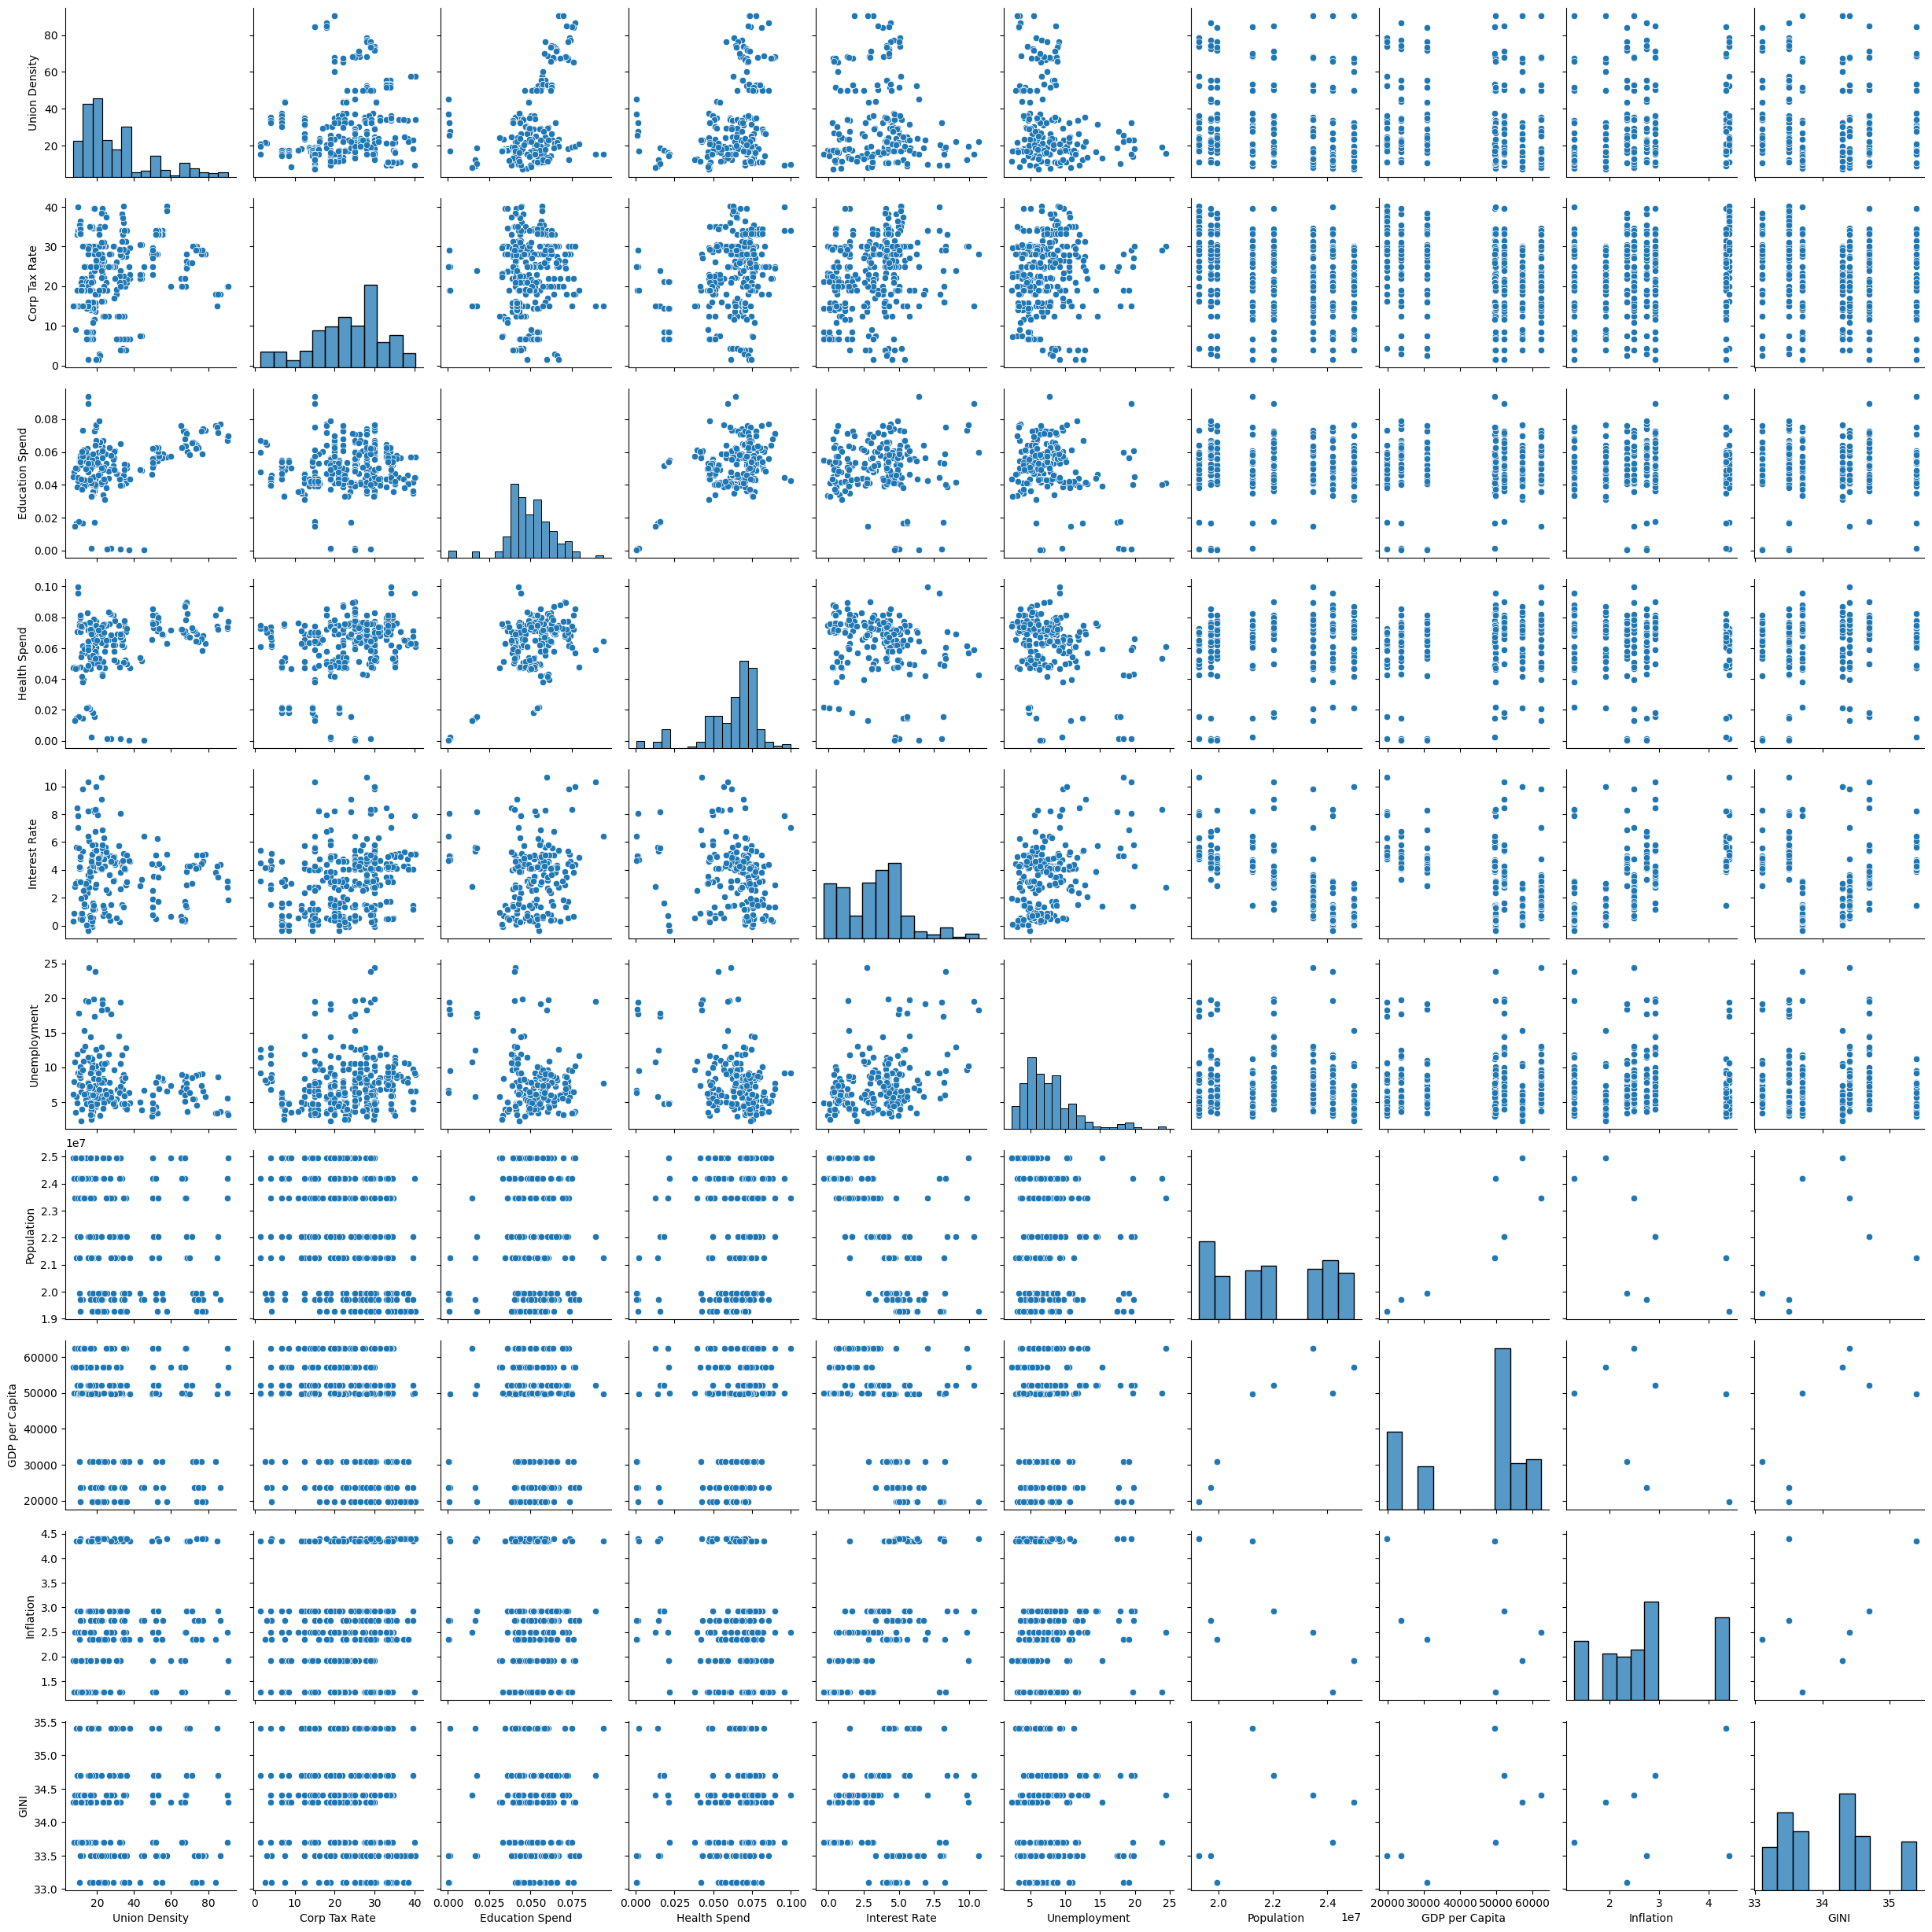

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rename and select only the relevant columns
cols = {
    'Trade union density': 'Union Density',
    'Combined corporate income tax rate': 'Corp Tax Rate',
    'Education spending': 'Education Spend',
    'Health spending': 'Health Spend',
    'IRLT': 'Interest Rate',
    'UNEMP': 'Unemployment',
    'Population, total': 'Population',
    'GDP per capita (current US$)': 'GDP per Capita',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Gini index' : 'GINI'
}

df_pairplot = megaframe[list(cols.keys())].rename(columns=cols)

# Create the pairplot
sns.pairplot(df_pairplot)
plt.show()
